# HW3 - 中文詞頻統計
#### 【Python人工智慧實戰_2020-04-29】

### Read Speech.txt file, use jieba to do word segmentation and do word frequency on each word

In [1]:
import jieba
import json

In [2]:
ret = open("./speech.txt", "r").read().strip()

## write your code here
print(ret)

如果你受邀在一場研討會或活動裡演講，很可能是因為你已展現某個領域的專業。為了讓觀眾有絕佳的體驗，你通常會把演講的重心，放在主辦人指定的主題，也就是你專業中「最精華」的部分。但如果每次都講完全一樣的內容，可能就會碰到麻煩：有些聽眾對你的演講內容比較有共鳴，另一些聽眾就沒什麼感覺；有些人之前可能就聽過你的演講，再聽到完全一樣的內容，就會感到無聊。

那麼，該如何達到最佳平衡，並有效地對不同聽眾，發表類似內容的演講？身為專業演講人，我每年都進行三十至五十場有酬勞的演講，以下提供我從過往經驗發現的三個策略，可協助你打造成功的演講，讓背景各異的聽眾都能產生共鳴。

首先，一個有用的做法，是把你的部分演講內容看成是「模組」，可依需要而移動和重組。我曾幫某位總統候選人競選，擔任高層的溝通部門人員，我發現這位候選人在競選演講裡，會用一些標準的「段落」，基本上，就是針對某些主題的大段獨白，像是學費更負擔得起的高等教育，或是他的美國聯邦醫療保險計畫（Medicare）改革方案等。

隨著時間過去，他已非常放心運用這些演練多次的模組，當他在演講或回答問題，可以安心運用這些內容。但他也經常重新組合這些內容，以符合聽眾的需求，也避免自己對這些內容感到無聊，因為他一天最多得發表六場演講。不要把你的演講內容，看成不可分割的整體，而應把它當成12到15段各約數分鐘的講稿內容，這麼一來，你就能構思新的方式來重組講稿內容，或是重新安排內容的順序，以便更符合情境所需。

第二，很重要的是，應該在演講之前，先充分了解你的聽眾。這很容易做到，與活動主辦人透過電子郵件或電話溝通即可。你應了解聽眾的人口特性和心理特性等資訊，以挑選最直接符合聽眾生活背景的內容模組。你可以特別留意聽眾是否屬於特定年齡層或性別，例如，主要與會人士是女性高階主管，或是大學剛畢業的新鮮人，還有他們在地理區域、職能角色、產業上的任何共同點。

舉例來說，我在某個城市發表演講時，會提到我自己書裡提及來自這個地區的人，好讓聽眾更容易與那些例子裡的人物建立關聯性。同樣地，如果你的聽眾是一群剛升職的經理人，就可以特別強調處於類似情況的人的故事，或是提到一些最近才歷經人生大轉變，或是換工作的人。

最後，若要針對不同聽眾調整你的演講內容，另一個關鍵因素，是弄清楚你的委託人預期達到的結果。會議主辦單位並不只是請你來填補一小時的時間，一定會有許多更省錢

In [3]:
import csv

In [4]:
with open("count.csv", "r", encoding='utf-8-sig', newline='') as fdr:
    ## write your code here    
    reader = csv.reader(fdr)  # 讀取 CSV 檔案內容
    header = next(reader)
    word_dict = dict(filter(None, reader)) # 轉成 Dictionary
    print(word_dict)   
    with open("count.txt", "w", encoding='utf-8-sig') as fdw:
        ## write your code here
        writer = csv.writer(fdw)
        writer.writerows(word_dict.items())

{'如果': '4', '你': '22', '受邀': '2', '在': '8', '一場': '1', '研討會': '1', '或': '4', '活動裡': '1', '演講': '17', '，': '80', '很': '4', '可能': '3', '是': '7', '因為': '3', '已': '2', '展現': '1', '某個': '2', '領域': '1', '的': '63', '專業': '3', '。': '24', '為': '1', '了': '2', '讓': '5', '觀眾': '1', '有': '4', '絕佳': '1', '體驗': '1', '通常': '2', '會': '6', '把': '4', '重心': '1', '放在': '1', '主辦': '3', '人': '9', '指定': '1', '主題': '3', '也': '6', '就是': '2', '中': '2', '「': '3', '最精華': '1', '」': '3', '部分': '2', '但': '4', '每次': '1', '都講': '1', '完全': '2', '一樣': '2', '內容': '19', '就': '9', '碰到': '1', '麻煩': '1', '：': '1', '有些': '2', '聽眾': '14', '對': '3', '比較': '1', '有共鳴': '1', '另': '2', '一些': '5', '沒什麼': '1', '感覺': '1', '；': '1', '之前': '3', '聽過': '1', '再': '1', '聽': '1', '到': '3', '感到': '2', '無聊': '2', '': '16', '那麼': '1', '該': '1', '如何': '2', '達到': '1', '最佳': '1', '平衡': '2', '並': '1', '有效': '1', '地': '3', '不同': '2', '發表類': '1', '似內容': '1', '？': '1', '身為': '1', '專業演': '1', '講人': '1', '我': '13', '每年': '1', '都': '2', '進行': '1', '三十': '

In [5]:
# 載入自定義詞庫 jieba.load_userdict(file_path)
jieba.load_userdict("count.txt")

words = " ".join(jieba.cut(ret, cut_all=False))
#for word in words:
#    print(word, end='')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.987 seconds.
Prefix dict has been built successfully.


### Use wordcloud to show the word frequency in the file "speech.txt"

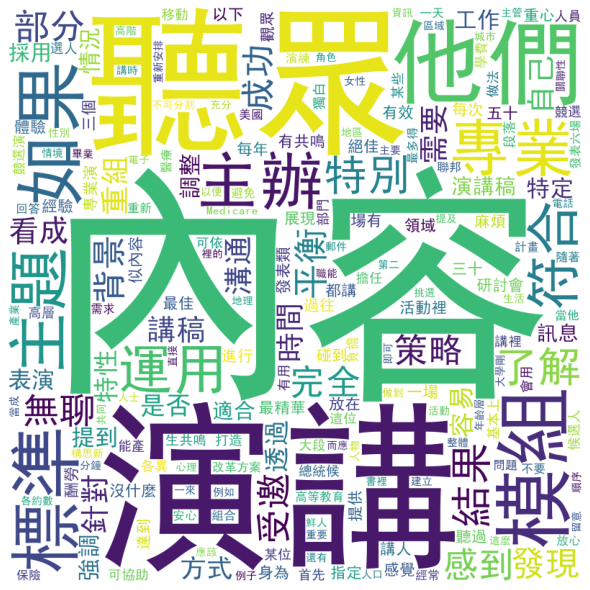

In [6]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## write your code here
stopwords = set()
stopwords.update(['然而', '這樣', '另一方面', '但是', '因此', '我們', '那些', '這些', '有些', '一些',
                  '它們', '具有', '人們', '可以', '這個', '這種', '不能', '因為', '的', '一個', '某個',
                  '或者', '沒有', '一種', '非常', '可能', '而且', '就', '基本', '舉例', '會',
                  '所有', '也許', '為了', '之前', '必須', '確定', '所以', '通常', '比較','不是', '已',
                  '任何', '發生', '能夠', '過去', '對於', '知道', '這是', '並', '那麼', '一點', '像是',
                  '或是', '不同', '並且', '一樣', '那樣', '其他', '什麼',
                  '如何', '仍然', '多次', '就是'])
#print(stopwords)

## show chinese in wordcloud: use WordCloud(font_path='simhei.ttf', ......)
wordcloud = WordCloud(width = 800, height = 800, 
                      font_path='simhei.ttf',
                      background_color ='white', 
                      stopwords = stopwords, #去除不須統計的字詞
                      min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [7]:
# 查看字詞出現頻率
process_word = WordCloud.process_text(wordcloud, words)

# 下面是字典排序
sort = sorted(process_word.items(), key=lambda e:e[1], reverse=True) # sort 為 list
print(sort[:50])  # 輸出前 50

[('內容', 19), ('演講', 17), ('聽眾', 14), ('他們', 7), ('模組', 5), ('如果', 4), ('標準', 4), ('專業', 3), ('主辦', 3), ('主題', 3), ('運用', 3), ('符合', 3), ('了解', 3), ('特別', 3), ('結果', 3), ('受邀', 2), ('部分', 2), ('完全', 2), ('感到', 2), ('無聊', 2), ('平衡', 2), ('發現', 2), ('策略', 2), ('成功', 2), ('背景', 2), ('看成', 2), ('需要', 2), ('重組', 2), ('溝通', 2), ('針對', 2), ('時間', 2), ('自己', 2), ('講稿', 2), ('方式', 2), ('容易', 2), ('透過', 2), ('特性', 2), ('是否', 2), ('特定', 2), ('表演', 2), ('提到', 2), ('強調', 2), ('情況', 2), ('工作', 2), ('調整', 2), ('採用', 2), ('演講稿', 2), ('適合', 2), ('訊息', 2), ('一場', 1)]
